In [1]:
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv2D, MaxPool2D, LayerNormalization
from tensorflow.keras.layers import Flatten, Dropout

import numpy as np

from PIL import Image
from numpy import asarray

Wczytanie pliku z oznaczeniami, przyporządkowanie etykiet do zdjęć

In [3]:
def get_images_from_txt(labels_txt_file, images_folder_path):
    output_list = []
    fold_labels_txt = open(labels_txt_file)
    
    for photo_label in fold_labels_txt:
        # split a label and a name
        is_coffee, photo_name = photo_label.split('.', 1)[0], photo_label.split('.', 1)[1][:-1]
    
        photo_path = images_folder_path + photo_name + '.jpg'
    
        # convert image to numpy array
        image = Image.open(photo_path)
        image_as_array = asarray(image)
    
        output_list.append([is_coffee, photo_name, image_as_array])

    fold_labels_txt.close()
    
    return output_list
    
fold1_labels_txt = 'brazilian_coffee_scenes/fold1.txt'
fold2_labels_txt = 'brazilian_coffee_scenes/fold2.txt'
fold3_labels_txt = 'brazilian_coffee_scenes/fold3.txt'
fold4_labels_txt = 'brazilian_coffee_scenes/fold4.txt'
fold1_path = 'brazilian_coffee_scenes/fold1/'
fold2_path = 'brazilian_coffee_scenes/fold2/'
fold3_path = 'brazilian_coffee_scenes/fold3/'
fold4_path = 'brazilian_coffee_scenes/fold4/'

label_photos = get_images_from_txt(fold1_labels_txt, fold1_path)
label_photos += get_images_from_txt(fold2_labels_txt, fold2_path)
label_photos += get_images_from_txt(fold3_labels_txt, fold3_path)
label_photos += get_images_from_txt(fold4_labels_txt, fold4_path)

print(label_photos[0])

['coffee', 'montesanto.T3456.B3520.L2560.R2624', array([[[  0,   2,   0],
        [  5,   7,   0],
        [  6,   0,   0],
        ...,
        [ 58, 131, 242],
        [ 59, 131, 242],
        [ 67, 137, 249]],

       [[  6,   8,   0],
        [  1,   1,   0],
        [ 17,  13,   2],
        ...,
        [ 63, 139, 249],
        [ 62, 134, 245],
        [ 65, 137, 248]],

       [[  1,   1,   0],
        [  2,   2,   0],
        [  1,   0,   0],
        ...,
        [ 62, 140, 251],
        [ 64, 137, 250],
        [ 69, 142, 255]],

       ...,

       [[ 45, 126, 182],
        [ 43, 122, 178],
        [ 45, 122, 176],
        ...,
        [121, 104,  96],
        [122, 109, 101],
        [122, 112, 103]],

       [[ 53, 132, 188],
        [ 49, 128, 184],
        [ 53, 129, 181],
        ...,
        [115, 100,  93],
        [115, 104,  98],
        [115, 106,  99]],

       [[ 52, 131, 187],
        [ 50, 127, 181],
        [ 52, 128, 180],
        ...,
        [113, 100,  92],


In [4]:
max_pixel_value = np.array(255)
for label_photo in label_photos:
    label_photo[-1] = label_photo[-1] / max_pixel_value

In [5]:
import random
from sklearn.model_selection import train_test_split

random.shuffle(label_photos)
train_ds, test_ds = train_test_split(label_photos, test_size=0.7)

train_ds_labels = [True if photo_lb[0] == 'coffee' else False for photo_lb in train_ds]
train_ds_photos = [photo_lb[2] for photo_lb in train_ds]
test_ds_labels = [True if photo_lb[0] == 'coffee' else False for photo_lb in test_ds]
test_ds_photos = [photo_lb[2] for photo_lb in test_ds]

train_ds_labels = np.array(train_ds_labels)
train_ds_photos = np.array(train_ds_photos)
test_ds_labels = np.array(test_ds_labels)
test_ds_photos = np.array(test_ds_photos)

print(train_ds_labels[:10])
print(len(train_ds_photos))
print(len(train_ds_labels))
print(train_ds_photos[0].shape)

[ True False False  True False False  True  True  True False]
720
720
(64, 64, 3)


In [6]:
model = tf.keras.Sequential([
    Conv2D(96, kernel_size=(5, 5), activation='relu', input_shape=(64,64,3)),
    MaxPool2D(pool_size=(2, 2)),
    LayerNormalization(axis=[1, 2, 3]),
    Conv2D(256, kernel_size=(5, 5), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    LayerNormalization(axis=[1, 2, 3]),
    Conv2D(256, kernel_size=(2, 2), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    Dropout(0.3),
    tf.keras.layers.Dense(512, activation='relu'),
    Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [24]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_ds_photos, train_ds_labels, epochs=8)

test_loss, test_acc = model.evaluate(test_ds_photos, test_ds_labels, verbose=2)

print('\nTest accuracy:', test_acc)

model.summary()

Epoch 1/8
23/23 [==============================] - 18s 767ms/step - loss: 0.7556 - accuracy: 0.5877
Epoch 2/8
23/23 [==============================] - 20s 880ms/step - loss: 0.6396 - accuracy: 0.6513
Epoch 3/8
23/23 [==============================] - 20s 868ms/step - loss: 0.6074 - accuracy: 0.6832
Epoch 4/8
23/23 [==============================] - 20s 884ms/step - loss: 0.6004 - accuracy: 0.7124
Epoch 5/8
23/23 [==============================] - 20s 851ms/step - loss: 0.6094 - accuracy: 0.6888
Epoch 6/8
23/23 [==============================] - 20s 848ms/step - loss: 0.5564 - accuracy: 0.7344
Epoch 7/8
23/23 [==============================] - 20s 852ms/step - loss: 0.5518 - accuracy: 0.7385
Epoch 8/8
23/23 [==============================] - 20s 857ms/step - loss: 0.5317 - accuracy: 0.7442
53/53 - 17s - loss: 0.5625 - accuracy: 0.7250

Test accuracy: 0.7250000238418579
Model: "sequential"
_________________________________________________________________
Layer (type)                 Outp

In [ ]:
Wizualizacja parametrów uczenia

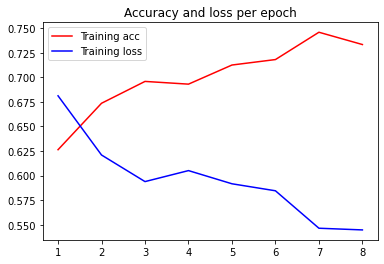

In [38]:
import matplotlib.pyplot as plt

accuracy_per_epoch = history.history['accuracy']
loss_per_epoch = history.history['loss']

epochs = range(1, len(loss_per_epoch) + 1)

plt.plot(epochs, accuracy_per_epoch, 'b', color='Red', label='Training acc')
plt.plot(epochs, loss_per_epoch, 'b', label='Training loss')
plt.title('Accuracy and loss per epoch')
plt.legend()
plt.show()

Image: montesanto.T1856.B1920.L6912.R6976
Is coffee: coffee
Model predicted: coffee
Confidence: 91.49%


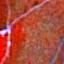

Image: montesanto.T7680.B7744.L3136.R3200
Is coffee: noncoffee
Model predicted: noncoffee
Confidence: 64.28%


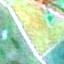

Image: montesanto.T9600.B9664.L8576.R8640
Is coffee: noncoffee
Model predicted: noncoffee
Confidence: 66.28%


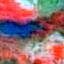

Image: montesanto.T4992.B5056.L3264.R3328
Is coffee: coffee
Model predicted: noncoffee
Confidence: 54.6%


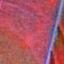

In [23]:
import os

def find_file_in_subfolder(root, filename):
    # returns a full path to file from the root
    for file_root, dirs, files in os.walk(root):
        for name in files:
            if name == filename:
                return file_root + '/' + name


def predict_coffee_crop_show_results(img_nr):
    prediction = model.predict(test_ds_photos[img_nr].reshape(-1, 64, 64, 3))[0][0]
    
    image_name = test_ds[img_nr][1]
    image_status = test_ds[img_nr][0]

    print(f'Image: {image_name}')
    print(f'Is coffee: {image_status}')
    if prediction > 0.5: 
        print('Model predicted: coffee')
        print(f'Confidence: {round(prediction * 100, 2)}%')
    else:
        print('Model predicted: noncoffee')
        print(f'Confidence: {round((1 - prediction) * 100, 2)}%')

    img_path = find_file_in_subfolder('brazilian_coffee_scenes/', image_name + '.jpg')
    img = Image.open(img_path)

    display(img)
    
predict_coffee_crop_show_results(12)
predict_coffee_crop_show_results(20)
predict_coffee_crop_show_results(90)
predict_coffee_crop_show_results(101)